In [1]:
from __future__ import division
import numpy as np
from neuron import h, gui
import matplotlib.pyplot as plt
plt.ion()

### Create passive model

In [2]:
# create model
soma = h.Section(name="soma")
soma.L    = 10 # the length of the soma
soma.diam = 10 # the diameter of the soma
soma.Ra   = 100 # tha axial resistance
soma.insert('pas') # add passive properties 
soma.g_pas = 1/10000 # set the specific membrane to 10000 ohm*cm^2

### Add input, recorders, run sim, plot results

In [3]:
# Add current clamp
stim = h.IClamp(soma(0.5))
stim.delay = 20
stim.dur = 100
stim.amp = 0.01
# Record voltage of soma and injected current and the time
soma_v = h.Vector()
soma_v.record(soma(0.5)._ref_v)
stim_current = h.Vector()
stim_current.record(stim._ref_i)
t = h.Vector()
t.record(h._ref_t)
# Run sim
h.tstop = 220
h.v_init = -70
h.run();

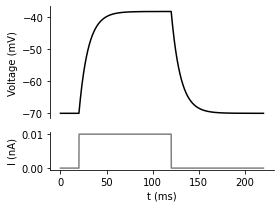

In [4]:
# plot the injected current and the voltage response
f, (ax0, ax1) = plt.subplots(2, 1, figsize=(4, 3), gridspec_kw={'height_ratios':[3, 1]})
ax0.plot(t,soma_v, 'k')
ax1.plot(t,stim_current, 'gray')

ax0.set_ylabel('Voltage (mV)')
ax0.spines['right'].set_visible(False)
ax0.spines['top'].set_visible(False)
ax0.spines['bottom'].set_visible(False)
ax0.get_xaxis().set_visible(False)

ax1.set_ylabel('I (nA)')
ax1.set_xlabel('t (ms)')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
plt.tight_layout()

### Add a synapse, rerun with synaptic activation

In [5]:
# add a synapse
synapse = h.Exp2Syn(soma(0.5))
synapse.tau1 = 0.3
synapse.tau2 = 1.8
stim = h.NetStim()
stim.number = 1
stim.noise = 0 
stim.interval = 1
net_con = h.NetCon(stim, synapse)
net_con.weight[0]= 0.0004

In [6]:
# record
soma_v = h.Vector()
soma_v.record(soma(0.5)._ref_v)
synapse_i = h.Vector()
synapse_i.record(synapse._ref_i)
# run
h.v_init = -70
h.tstop = 125
h.run()

0.0

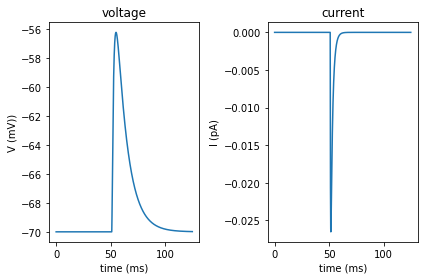

In [7]:
# plot the results
fig, ax = plt.subplots(1, 2)
ax[0].plot(t, soma_v)
ax[1].plot(t, synapse_i)
ax[0].set_xlabel("time (ms)")
ax[1].set_xlabel("time (ms)")
ax[0].set_ylabel("V (mV))")
ax[1].set_ylabel("I (pA)")
ax[0].set_title("voltage")
ax[1].set_title("current")
plt.tight_layout()